In [1]:
import tensorflow as tf
import numpy as np

corpus_raw = 'He is the king . The king is royal . She is the royal  queen '

# convert to lower case
corpus_raw = corpus_raw.lower()

words = []
for word in corpus_raw.split():
    if word != '.': # because we don't want to treat . as a word
        words.append(word)

words = set(words) # so that all duplicate words are removed
word2int = {}
int2word = {}
vocab_size = len(words) # gives the total number of unique words

for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

# raw sentences is a list of sentences.
raw_sentences = corpus_raw.split('.')
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())

WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 
            if nb_word != word:
                data.append([word, nb_word])

/Users/300032675/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# function to convert numbers to one hot vectors
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp


In [3]:
x_train = [] # input word
y_train = [] # output word

for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))

# convert them to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)


In [4]:
# making placeholders for x_train and y_train
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))


In [18]:
EMBEDDING_DIM = 5 # you can choose your own number
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM])) #bias
hidden_representation = tf.add(tf.matmul(x,W1), b1)

In [19]:
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

In [20]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) #make sure you do this!

# define the loss function:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))

# define the training step:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)

In [21]:
n_iters = 10000
# train for n_iter iterations

for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))

vectors = sess.run(W1 + b1)

def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index


('loss is : ', 5.167022)
('loss is : ', 4.667632)
('loss is : ', 4.2685356)
('loss is : ', 3.9511251)
('loss is : ', 3.7006493)
('loss is : ', 3.5026395)
('loss is : ', 3.3434303)
('loss is : ', 3.2117834)
('loss is : ', 3.0995314)
('loss is : ', 3.001193)
('loss is : ', 2.913233)
('loss is : ', 2.8333955)
('loss is : ', 2.7602255)
('loss is : ', 2.6927607)
('loss is : ', 2.6303387)
('loss is : ', 2.5724761)
('loss is : ', 2.5188003)
('loss is : ', 2.4690032)
('loss is : ', 2.4228156)
('loss is : ', 2.3799927)
('loss is : ', 2.3403034)
('loss is : ', 2.3035283)
('loss is : ', 2.2694554)
('loss is : ', 2.2378814)
('loss is : ', 2.2086112)
('loss is : ', 2.1814587)
('loss is : ', 2.1562483)
('loss is : ', 2.1328146)
('loss is : ', 2.111004)
('loss is : ', 2.0906732)
('loss is : ', 2.0716908)
('loss is : ', 2.053937)
('loss is : ', 2.037302)
('loss is : ', 2.0216856)
('loss is : ', 2.0069985)
('loss is : ', 1.9931598)
('loss is : ', 1.9800959)
('loss is : ', 1.9677411)
('loss is : ', 1.95

('loss is : ', 1.4063519)
('loss is : ', 1.4060572)
('loss is : ', 1.4057641)
('loss is : ', 1.4054728)
('loss is : ', 1.4051828)
('loss is : ', 1.4048945)
('loss is : ', 1.4046075)
('loss is : ', 1.4043224)
('loss is : ', 1.4040387)
('loss is : ', 1.4037564)
('loss is : ', 1.4034758)
('loss is : ', 1.4031965)
('loss is : ', 1.4029188)
('loss is : ', 1.4026424)
('loss is : ', 1.4023676)
('loss is : ', 1.4020942)
('loss is : ', 1.4018222)
('loss is : ', 1.4015515)
('loss is : ', 1.4012824)
('loss is : ', 1.4010147)
('loss is : ', 1.4007483)
('loss is : ', 1.4004834)
('loss is : ', 1.4002198)
('loss is : ', 1.3999574)
('loss is : ', 1.3996964)
('loss is : ', 1.3994367)
('loss is : ', 1.3991785)
('loss is : ', 1.3989215)
('loss is : ', 1.3986658)
('loss is : ', 1.3984115)
('loss is : ', 1.3981581)
('loss is : ', 1.3979063)
('loss is : ', 1.3976556)
('loss is : ', 1.3974062)
('loss is : ', 1.3971581)
('loss is : ', 1.396911)
('loss is : ', 1.3966653)
('loss is : ', 1.3964208)
('loss is : '

('loss is : ', 1.3485581)
('loss is : ', 1.348489)
('loss is : ', 1.3484204)
('loss is : ', 1.3483518)
('loss is : ', 1.3482835)
('loss is : ', 1.3482153)
('loss is : ', 1.3481475)
('loss is : ', 1.3480798)
('loss is : ', 1.3480123)
('loss is : ', 1.3479452)
('loss is : ', 1.347878)
('loss is : ', 1.3478111)
('loss is : ', 1.3477445)
('loss is : ', 1.3476781)
('loss is : ', 1.3476118)
('loss is : ', 1.3475457)
('loss is : ', 1.3474797)
('loss is : ', 1.347414)
('loss is : ', 1.3473486)
('loss is : ', 1.3472834)
('loss is : ', 1.3472182)
('loss is : ', 1.3471534)
('loss is : ', 1.3470887)
('loss is : ', 1.3470242)
('loss is : ', 1.34696)
('loss is : ', 1.3468958)
('loss is : ', 1.3468319)
('loss is : ', 1.3467684)
('loss is : ', 1.3467047)
('loss is : ', 1.3466415)
('loss is : ', 1.3465784)
('loss is : ', 1.3465153)
('loss is : ', 1.3464526)
('loss is : ', 1.3463901)
('loss is : ', 1.3463277)
('loss is : ', 1.3462654)
('loss is : ', 1.3462034)
('loss is : ', 1.3461417)
('loss is : ', 1.

('loss is : ', 1.3325449)
('loss is : ', 1.3325237)
('loss is : ', 1.3325027)
('loss is : ', 1.3324817)
('loss is : ', 1.3324609)
('loss is : ', 1.3324398)
('loss is : ', 1.3324192)
('loss is : ', 1.3323984)
('loss is : ', 1.3323776)
('loss is : ', 1.3323569)
('loss is : ', 1.3323364)
('loss is : ', 1.3323157)
('loss is : ', 1.3322953)
('loss is : ', 1.3322749)
('loss is : ', 1.3322544)
('loss is : ', 1.3322341)
('loss is : ', 1.3322139)
('loss is : ', 1.3321939)
('loss is : ', 1.3321736)
('loss is : ', 1.3321536)
('loss is : ', 1.3321335)
('loss is : ', 1.3321136)
('loss is : ', 1.3320936)
('loss is : ', 1.3320737)
('loss is : ', 1.3320538)
('loss is : ', 1.3320341)
('loss is : ', 1.3320143)
('loss is : ', 1.3319947)
('loss is : ', 1.3319751)
('loss is : ', 1.3319556)
('loss is : ', 1.331936)
('loss is : ', 1.3319166)
('loss is : ', 1.3318971)
('loss is : ', 1.3318777)
('loss is : ', 1.3318585)
('loss is : ', 1.3318393)
('loss is : ', 1.3318202)
('loss is : ', 1.3318009)
('loss is : '

('loss is : ', 1.3272154)
('loss is : ', 1.3272072)
('loss is : ', 1.3271993)
('loss is : ', 1.3271912)
('loss is : ', 1.3271832)
('loss is : ', 1.3271754)
('loss is : ', 1.3271674)
('loss is : ', 1.3271592)
('loss is : ', 1.3271513)
('loss is : ', 1.3271434)
('loss is : ', 1.3271354)
('loss is : ', 1.3271276)
('loss is : ', 1.3271197)
('loss is : ', 1.327112)
('loss is : ', 1.327104)
('loss is : ', 1.3270961)
('loss is : ', 1.3270882)
('loss is : ', 1.3270806)
('loss is : ', 1.3270729)
('loss is : ', 1.327065)
('loss is : ', 1.3270572)
('loss is : ', 1.3270495)
('loss is : ', 1.3270417)
('loss is : ', 1.327034)
('loss is : ', 1.3270264)
('loss is : ', 1.3270185)
('loss is : ', 1.3270109)
('loss is : ', 1.3270034)
('loss is : ', 1.3269957)
('loss is : ', 1.3269881)
('loss is : ', 1.3269805)
('loss is : ', 1.326973)
('loss is : ', 1.3269656)
('loss is : ', 1.326958)
('loss is : ', 1.3269502)
('loss is : ', 1.3269429)
('loss is : ', 1.3269353)
('loss is : ', 1.3269279)
('loss is : ', 1.3

('loss is : ', 1.32491)
('loss is : ', 1.3249061)
('loss is : ', 1.3249022)
('loss is : ', 1.3248982)
('loss is : ', 1.3248944)
('loss is : ', 1.3248905)
('loss is : ', 1.3248867)
('loss is : ', 1.3248829)
('loss is : ', 1.3248789)
('loss is : ', 1.3248751)
('loss is : ', 1.3248713)
('loss is : ', 1.3248675)
('loss is : ', 1.3248636)
('loss is : ', 1.3248599)
('loss is : ', 1.3248559)
('loss is : ', 1.3248522)
('loss is : ', 1.3248483)
('loss is : ', 1.3248446)
('loss is : ', 1.3248408)
('loss is : ', 1.324837)
('loss is : ', 1.3248332)
('loss is : ', 1.3248293)
('loss is : ', 1.3248256)
('loss is : ', 1.3248218)
('loss is : ', 1.3248183)
('loss is : ', 1.3248143)
('loss is : ', 1.3248105)
('loss is : ', 1.3248069)
('loss is : ', 1.3248031)
('loss is : ', 1.3247993)
('loss is : ', 1.3247957)
('loss is : ', 1.3247919)
('loss is : ', 1.3247882)
('loss is : ', 1.3247844)
('loss is : ', 1.3247807)
('loss is : ', 1.3247771)
('loss is : ', 1.3247733)
('loss is : ', 1.3247697)
('loss is : ', 

('loss is : ', 1.3238411)
('loss is : ', 1.3238387)
('loss is : ', 1.3238363)
('loss is : ', 1.323834)
('loss is : ', 1.3238317)
('loss is : ', 1.3238292)
('loss is : ', 1.3238268)
('loss is : ', 1.3238245)
('loss is : ', 1.3238221)
('loss is : ', 1.3238198)
('loss is : ', 1.3238173)
('loss is : ', 1.3238151)
('loss is : ', 1.3238126)
('loss is : ', 1.3238102)
('loss is : ', 1.3238078)
('loss is : ', 1.3238056)
('loss is : ', 1.3238032)
('loss is : ', 1.3238008)
('loss is : ', 1.3237985)
('loss is : ', 1.3237962)
('loss is : ', 1.3237938)
('loss is : ', 1.3237915)
('loss is : ', 1.323789)
('loss is : ', 1.3237867)
('loss is : ', 1.3237844)
('loss is : ', 1.3237821)
('loss is : ', 1.3237798)
('loss is : ', 1.3237774)
('loss is : ', 1.3237752)
('loss is : ', 1.3237728)
('loss is : ', 1.3237705)
('loss is : ', 1.3237683)
('loss is : ', 1.3237659)
('loss is : ', 1.3237637)
('loss is : ', 1.3237613)
('loss is : ', 1.323759)
('loss is : ', 1.3237568)
('loss is : ', 1.3237543)
('loss is : ', 

('loss is : ', 1.323092)
('loss is : ', 1.3230906)
('loss is : ', 1.3230889)
('loss is : ', 1.3230875)
('loss is : ', 1.323086)
('loss is : ', 1.3230844)
('loss is : ', 1.3230828)
('loss is : ', 1.3230811)
('loss is : ', 1.3230796)
('loss is : ', 1.3230782)
('loss is : ', 1.3230767)
('loss is : ', 1.3230753)
('loss is : ', 1.3230736)
('loss is : ', 1.3230722)
('loss is : ', 1.3230708)
('loss is : ', 1.3230691)
('loss is : ', 1.3230677)
('loss is : ', 1.323066)
('loss is : ', 1.3230646)
('loss is : ', 1.323063)
('loss is : ', 1.3230617)
('loss is : ', 1.32306)
('loss is : ', 1.3230585)
('loss is : ', 1.3230572)
('loss is : ', 1.3230556)
('loss is : ', 1.3230542)
('loss is : ', 1.3230525)
('loss is : ', 1.3230511)
('loss is : ', 1.3230495)
('loss is : ', 1.3230482)
('loss is : ', 1.3230467)
('loss is : ', 1.3230451)
('loss is : ', 1.3230437)
('loss is : ', 1.3230422)
('loss is : ', 1.3230408)
('loss is : ', 1.3230392)
('loss is : ', 1.3230377)
('loss is : ', 1.3230363)
('loss is : ', 1.3

('loss is : ', 1.3226023)
('loss is : ', 1.3226011)
('loss is : ', 1.3226)
('loss is : ', 1.3225988)
('loss is : ', 1.3225979)
('loss is : ', 1.3225968)
('loss is : ', 1.3225958)
('loss is : ', 1.3225948)
('loss is : ', 1.3225937)
('loss is : ', 1.3225926)
('loss is : ', 1.3225914)
('loss is : ', 1.3225905)
('loss is : ', 1.3225895)
('loss is : ', 1.3225883)
('loss is : ', 1.3225874)
('loss is : ', 1.3225863)
('loss is : ', 1.3225851)
('loss is : ', 1.3225842)
('loss is : ', 1.3225832)
('loss is : ', 1.322582)
('loss is : ', 1.322581)
('loss is : ', 1.32258)
('loss is : ', 1.3225789)
('loss is : ', 1.322578)
('loss is : ', 1.3225768)
('loss is : ', 1.3225757)
('loss is : ', 1.3225749)
('loss is : ', 1.3225737)
('loss is : ', 1.3225726)
('loss is : ', 1.3225716)
('loss is : ', 1.3225707)
('loss is : ', 1.3225696)
('loss is : ', 1.3225684)
('loss is : ', 1.3225676)
('loss is : ', 1.3225664)
('loss is : ', 1.3225654)
('loss is : ', 1.3225644)
('loss is : ', 1.3225633)
('loss is : ', 1.322

('loss is : ', 1.3222593)
('loss is : ', 1.3222587)
('loss is : ', 1.3222579)
('loss is : ', 1.322257)
('loss is : ', 1.3222562)
('loss is : ', 1.3222555)
('loss is : ', 1.3222547)
('loss is : ', 1.3222541)
('loss is : ', 1.3222531)
('loss is : ', 1.3222524)
('loss is : ', 1.3222516)
('loss is : ', 1.322251)
('loss is : ', 1.3222501)
('loss is : ', 1.3222494)
('loss is : ', 1.3222486)
('loss is : ', 1.3222477)
('loss is : ', 1.322247)
('loss is : ', 1.3222461)
('loss is : ', 1.3222456)
('loss is : ', 1.3222448)
('loss is : ', 1.3222439)
('loss is : ', 1.3222431)
('loss is : ', 1.3222423)
('loss is : ', 1.3222418)
('loss is : ', 1.322241)
('loss is : ', 1.3222401)
('loss is : ', 1.3222393)
('loss is : ', 1.3222387)
('loss is : ', 1.3222378)
('loss is : ', 1.3222371)
('loss is : ', 1.3222362)
('loss is : ', 1.3222356)
('loss is : ', 1.3222347)
('loss is : ', 1.3222342)
('loss is : ', 1.3222333)
('loss is : ', 1.3222325)
('loss is : ', 1.3222317)
('loss is : ', 1.322231)
('loss is : ', 1.

('loss is : ', 1.3219869)
('loss is : ', 1.3219863)
('loss is : ', 1.3219858)
('loss is : ', 1.3219852)
('loss is : ', 1.3219845)
('loss is : ', 1.321984)
('loss is : ', 1.3219835)
('loss is : ', 1.3219829)
('loss is : ', 1.3219824)
('loss is : ', 1.3219818)
('loss is : ', 1.3219811)
('loss is : ', 1.3219806)
('loss is : ', 1.3219801)
('loss is : ', 1.3219794)
('loss is : ', 1.3219788)
('loss is : ', 1.3219783)
('loss is : ', 1.3219777)
('loss is : ', 1.3219771)
('loss is : ', 1.3219767)
('loss is : ', 1.3219761)
('loss is : ', 1.3219752)
('loss is : ', 1.3219748)
('loss is : ', 1.3219742)
('loss is : ', 1.3219737)
('loss is : ', 1.3219731)
('loss is : ', 1.3219726)
('loss is : ', 1.3219719)
('loss is : ', 1.3219713)
('loss is : ', 1.3219708)
('loss is : ', 1.3219702)
('loss is : ', 1.3219696)
('loss is : ', 1.321969)
('loss is : ', 1.3219684)
('loss is : ', 1.321968)
('loss is : ', 1.3219675)
('loss is : ', 1.3219669)
('loss is : ', 1.3219662)
('loss is : ', 1.3219657)
('loss is : ', 

('loss is : ', 1.3217933)
('loss is : ', 1.3217927)
('loss is : ', 1.3217921)
('loss is : ', 1.3217918)
('loss is : ', 1.3217914)
('loss is : ', 1.3217908)
('loss is : ', 1.3217903)
('loss is : ', 1.3217899)
('loss is : ', 1.3217896)
('loss is : ', 1.321789)
('loss is : ', 1.3217887)
('loss is : ', 1.3217881)
('loss is : ', 1.3217877)
('loss is : ', 1.3217874)
('loss is : ', 1.3217868)
('loss is : ', 1.3217864)
('loss is : ', 1.3217859)
('loss is : ', 1.3217854)
('loss is : ', 1.321785)
('loss is : ', 1.3217845)
('loss is : ', 1.321784)
('loss is : ', 1.3217837)
('loss is : ', 1.3217832)
('loss is : ', 1.3217826)
('loss is : ', 1.3217824)
('loss is : ', 1.3217819)
('loss is : ', 1.3217813)
('loss is : ', 1.3217809)
('loss is : ', 1.3217804)
('loss is : ', 1.32178)
('loss is : ', 1.3217796)
('loss is : ', 1.3217793)
('loss is : ', 1.3217785)
('loss is : ', 1.3217783)
('loss is : ', 1.3217778)
('loss is : ', 1.3217773)
('loss is : ', 1.3217769)
('loss is : ', 1.3217764)
('loss is : ', 1.

('loss is : ', 1.3216347)
('loss is : ', 1.3216343)
('loss is : ', 1.3216339)
('loss is : ', 1.3216335)
('loss is : ', 1.3216332)
('loss is : ', 1.3216327)
('loss is : ', 1.3216325)
('loss is : ', 1.3216321)
('loss is : ', 1.3216317)
('loss is : ', 1.3216314)
('loss is : ', 1.3216311)
('loss is : ', 1.3216306)
('loss is : ', 1.3216302)
('loss is : ', 1.3216298)
('loss is : ', 1.3216295)
('loss is : ', 1.3216292)
('loss is : ', 1.3216288)
('loss is : ', 1.3216285)
('loss is : ', 1.321628)
('loss is : ', 1.3216276)
('loss is : ', 1.3216274)
('loss is : ', 1.3216269)
('loss is : ', 1.3216265)
('loss is : ', 1.3216263)
('loss is : ', 1.3216258)
('loss is : ', 1.3216257)
('loss is : ', 1.3216252)
('loss is : ', 1.321625)
('loss is : ', 1.3216244)
('loss is : ', 1.321624)
('loss is : ', 1.3216237)
('loss is : ', 1.3216233)
('loss is : ', 1.3216231)
('loss is : ', 1.3216226)
('loss is : ', 1.3216223)
('loss is : ', 1.3216219)
('loss is : ', 1.3216214)
('loss is : ', 1.3216212)
('loss is : ', 

('loss is : ', 1.3215072)
('loss is : ', 1.3215069)
('loss is : ', 1.3215066)
('loss is : ', 1.3215063)
('loss is : ', 1.321506)
('loss is : ', 1.3215055)
('loss is : ', 1.3215055)
('loss is : ', 1.3215051)
('loss is : ', 1.3215047)
('loss is : ', 1.3215044)
('loss is : ', 1.3215041)
('loss is : ', 1.3215038)
('loss is : ', 1.3215036)
('loss is : ', 1.3215034)
('loss is : ', 1.3215029)
('loss is : ', 1.3215028)
('loss is : ', 1.3215022)
('loss is : ', 1.321502)
('loss is : ', 1.3215017)
('loss is : ', 1.3215015)
('loss is : ', 1.3215011)
('loss is : ', 1.3215009)
('loss is : ', 1.3215005)
('loss is : ', 1.3215003)
('loss is : ', 1.3215)
('loss is : ', 1.3214997)
('loss is : ', 1.3214993)
('loss is : ', 1.3214991)
('loss is : ', 1.3214988)
('loss is : ', 1.3214984)
('loss is : ', 1.3214983)
('loss is : ', 1.3214979)
('loss is : ', 1.3214977)
('loss is : ', 1.3214974)
('loss is : ', 1.3214971)
('loss is : ', 1.3214968)
('loss is : ', 1.3214965)
('loss is : ', 1.3214961)
('loss is : ', 1.

('loss is : ', 1.3213962)
('loss is : ', 1.321396)
('loss is : ', 1.3213958)
('loss is : ', 1.3213954)
('loss is : ', 1.3213952)
('loss is : ', 1.3213949)
('loss is : ', 1.3213947)
('loss is : ', 1.3213944)
('loss is : ', 1.3213942)
('loss is : ', 1.3213941)
('loss is : ', 1.3213938)
('loss is : ', 1.3213935)
('loss is : ', 1.3213933)
('loss is : ', 1.3213931)
('loss is : ', 1.3213928)
('loss is : ', 1.3213927)
('loss is : ', 1.3213922)
('loss is : ', 1.321392)
('loss is : ', 1.3213918)
('loss is : ', 1.3213916)
('loss is : ', 1.3213913)
('loss is : ', 1.3213911)
('loss is : ', 1.3213909)
('loss is : ', 1.3213906)
('loss is : ', 1.3213903)
('loss is : ', 1.32139)
('loss is : ', 1.3213899)
('loss is : ', 1.3213897)
('loss is : ', 1.3213894)
('loss is : ', 1.3213892)
('loss is : ', 1.321389)
('loss is : ', 1.3213887)
('loss is : ', 1.3213884)
('loss is : ', 1.3213881)
('loss is : ', 1.3213879)
('loss is : ', 1.3213876)
('loss is : ', 1.3213875)
('loss is : ', 1.3213873)
('loss is : ', 1.

('loss is : ', 1.3213094)
('loss is : ', 1.3213093)
('loss is : ', 1.3213091)
('loss is : ', 1.3213089)
('loss is : ', 1.3213087)
('loss is : ', 1.3213086)
('loss is : ', 1.3213083)
('loss is : ', 1.321308)
('loss is : ', 1.3213078)
('loss is : ', 1.3213075)
('loss is : ', 1.3213073)
('loss is : ', 1.3213072)
('loss is : ', 1.321307)
('loss is : ', 1.3213068)
('loss is : ', 1.3213066)
('loss is : ', 1.3213063)
('loss is : ', 1.3213061)
('loss is : ', 1.321306)
('loss is : ', 1.3213058)
('loss is : ', 1.3213054)
('loss is : ', 1.3213054)
('loss is : ', 1.3213052)
('loss is : ', 1.321305)
('loss is : ', 1.3213048)
('loss is : ', 1.3213046)
('loss is : ', 1.3213042)
('loss is : ', 1.3213042)
('loss is : ', 1.321304)
('loss is : ', 1.3213036)
('loss is : ', 1.3213034)
('loss is : ', 1.3213034)
('loss is : ', 1.3213032)
('loss is : ', 1.3213029)
('loss is : ', 1.3213029)
('loss is : ', 1.3213025)
('loss is : ', 1.3213023)
('loss is : ', 1.321302)
('loss is : ', 1.3213018)
('loss is : ', 1.3

('loss is : ', 1.3212328)
('loss is : ', 1.3212327)
('loss is : ', 1.3212326)
('loss is : ', 1.3212323)
('loss is : ', 1.3212321)
('loss is : ', 1.3212321)
('loss is : ', 1.3212318)
('loss is : ', 1.3212315)
('loss is : ', 1.3212314)
('loss is : ', 1.3212312)
('loss is : ', 1.3212312)
('loss is : ', 1.3212309)
('loss is : ', 1.3212308)
('loss is : ', 1.3212306)
('loss is : ', 1.3212304)
('loss is : ', 1.3212302)
('loss is : ', 1.3212299)
('loss is : ', 1.3212299)
('loss is : ', 1.3212296)
('loss is : ', 1.3212295)
('loss is : ', 1.3212293)
('loss is : ', 1.3212292)
('loss is : ', 1.321229)
('loss is : ', 1.3212289)
('loss is : ', 1.3212286)
('loss is : ', 1.3212285)
('loss is : ', 1.3212283)
('loss is : ', 1.3212281)
('loss is : ', 1.3212279)
('loss is : ', 1.3212277)
('loss is : ', 1.3212276)
('loss is : ', 1.3212274)
('loss is : ', 1.3212272)
('loss is : ', 1.3212271)
('loss is : ', 1.321227)
('loss is : ', 1.3212267)
('loss is : ', 1.3212265)
('loss is : ', 1.3212264)
('loss is : ',

('loss is : ', 1.3211677)
('loss is : ', 1.3211676)
('loss is : ', 1.3211675)
('loss is : ', 1.3211672)
('loss is : ', 1.3211672)
('loss is : ', 1.321167)
('loss is : ', 1.321167)
('loss is : ', 1.3211668)
('loss is : ', 1.3211665)
('loss is : ', 1.3211664)
('loss is : ', 1.3211663)
('loss is : ', 1.321166)
('loss is : ', 1.3211659)
('loss is : ', 1.3211658)
('loss is : ', 1.3211657)
('loss is : ', 1.3211654)
('loss is : ', 1.3211653)
('loss is : ', 1.3211652)
('loss is : ', 1.3211651)
('loss is : ', 1.321165)
('loss is : ', 1.3211648)
('loss is : ', 1.3211645)
('loss is : ', 1.3211644)
('loss is : ', 1.3211643)
('loss is : ', 1.3211641)
('loss is : ', 1.321164)
('loss is : ', 1.3211638)
('loss is : ', 1.3211638)
('loss is : ', 1.3211635)
('loss is : ', 1.3211634)
('loss is : ', 1.3211633)
('loss is : ', 1.3211632)
('loss is : ', 1.3211629)
('loss is : ', 1.3211628)
('loss is : ', 1.3211626)
('loss is : ', 1.3211623)
('loss is : ', 1.3211623)
('loss is : ', 1.3211622)
('loss is : ', 1.

('loss is : ', 1.3211114)
('loss is : ', 1.3211113)
('loss is : ', 1.3211111)
('loss is : ', 1.3211111)
('loss is : ', 1.3211108)
('loss is : ', 1.3211107)
('loss is : ', 1.3211107)
('loss is : ', 1.3211106)
('loss is : ', 1.3211104)
('loss is : ', 1.3211104)
('loss is : ', 1.3211102)
('loss is : ', 1.32111)
('loss is : ', 1.3211098)
('loss is : ', 1.3211097)
('loss is : ', 1.3211095)
('loss is : ', 1.3211095)
('loss is : ', 1.3211093)
('loss is : ', 1.3211092)
('loss is : ', 1.3211089)
('loss is : ', 1.3211088)
('loss is : ', 1.3211088)
('loss is : ', 1.3211088)
('loss is : ', 1.3211085)
('loss is : ', 1.3211085)
('loss is : ', 1.3211082)
('loss is : ', 1.3211082)
('loss is : ', 1.3211081)
('loss is : ', 1.321108)
('loss is : ', 1.3211077)
('loss is : ', 1.3211076)
('loss is : ', 1.3211074)
('loss is : ', 1.3211074)
('loss is : ', 1.3211073)
('loss is : ', 1.321107)
('loss is : ', 1.3211069)
('loss is : ', 1.3211069)
('loss is : ', 1.3211068)
('loss is : ', 1.3211067)
('loss is : ', 1

('loss is : ', 1.321063)
('loss is : ', 1.3210629)
('loss is : ', 1.3210627)
('loss is : ', 1.3210627)
('loss is : ', 1.3210626)
('loss is : ', 1.3210624)
('loss is : ', 1.3210622)
('loss is : ', 1.3210622)
('loss is : ', 1.321062)
('loss is : ', 1.3210618)
('loss is : ', 1.3210618)
('loss is : ', 1.3210617)
('loss is : ', 1.3210615)
('loss is : ', 1.3210615)
('loss is : ', 1.3210614)
('loss is : ', 1.3210613)
('loss is : ', 1.3210611)
('loss is : ', 1.3210611)
('loss is : ', 1.3210609)
('loss is : ', 1.3210608)
('loss is : ', 1.3210608)
('loss is : ', 1.3210607)
('loss is : ', 1.3210605)
('loss is : ', 1.3210603)
('loss is : ', 1.3210602)
('loss is : ', 1.3210602)
('loss is : ', 1.32106)
('loss is : ', 1.3210598)
('loss is : ', 1.32106)
('loss is : ', 1.3210597)
('loss is : ', 1.3210595)
('loss is : ', 1.3210593)
('loss is : ', 1.3210593)
('loss is : ', 1.3210592)
('loss is : ', 1.3210592)
('loss is : ', 1.321059)
('loss is : ', 1.3210589)
('loss is : ', 1.3210588)
('loss is : ', 1.32

('loss is : ', 1.3210195)
('loss is : ', 1.3210195)
('loss is : ', 1.3210194)
('loss is : ', 1.3210193)
('loss is : ', 1.3210193)
('loss is : ', 1.3210192)
('loss is : ', 1.3210189)
('loss is : ', 1.321019)
('loss is : ', 1.3210188)
('loss is : ', 1.3210189)
('loss is : ', 1.3210188)
('loss is : ', 1.3210186)
('loss is : ', 1.3210185)
('loss is : ', 1.3210183)
('loss is : ', 1.3210182)
('loss is : ', 1.3210182)
('loss is : ', 1.3210181)
('loss is : ', 1.321018)
('loss is : ', 1.3210177)
('loss is : ', 1.3210176)
('loss is : ', 1.3210176)
('loss is : ', 1.3210175)
('loss is : ', 1.3210174)
('loss is : ', 1.3210174)
('loss is : ', 1.3210173)
('loss is : ', 1.3210173)
('loss is : ', 1.3210171)
('loss is : ', 1.3210169)
('loss is : ', 1.3210169)
('loss is : ', 1.3210167)
('loss is : ', 1.3210167)
('loss is : ', 1.3210167)
('loss is : ', 1.3210164)
('loss is : ', 1.3210163)
('loss is : ', 1.3210163)
('loss is : ', 1.3210161)
('loss is : ', 1.3210161)
('loss is : ', 1.321016)
('loss is : ', 

('loss is : ', 1.3209838)
('loss is : ', 1.3209838)
('loss is : ', 1.3209838)
('loss is : ', 1.3209835)
('loss is : ', 1.3209835)
('loss is : ', 1.3209834)
('loss is : ', 1.3209833)
('loss is : ', 1.3209832)
('loss is : ', 1.3209832)
('loss is : ', 1.3209832)
('loss is : ', 1.3209829)
('loss is : ', 1.3209829)
('loss is : ', 1.3209828)
('loss is : ', 1.3209828)
('loss is : ', 1.3209826)
('loss is : ', 1.3209826)
('loss is : ', 1.3209825)
('loss is : ', 1.3209825)
('loss is : ', 1.3209822)
('loss is : ', 1.3209822)
('loss is : ', 1.3209822)
('loss is : ', 1.320982)
('loss is : ', 1.3209819)
('loss is : ', 1.3209819)
('loss is : ', 1.3209816)
('loss is : ', 1.3209816)
('loss is : ', 1.3209815)
('loss is : ', 1.3209814)
('loss is : ', 1.3209814)
('loss is : ', 1.3209813)
('loss is : ', 1.320981)
('loss is : ', 1.320981)
('loss is : ', 1.3209809)
('loss is : ', 1.320981)
('loss is : ', 1.3209809)
('loss is : ', 1.3209809)
('loss is : ', 1.3209808)
('loss is : ', 1.3209805)
('loss is : ', 1

('loss is : ', 1.3209491)
('loss is : ', 1.3209488)
('loss is : ', 1.320949)
('loss is : ', 1.3209488)
('loss is : ', 1.3209488)
('loss is : ', 1.3209487)
('loss is : ', 1.3209486)
('loss is : ', 1.3209486)
('loss is : ', 1.3209486)
('loss is : ', 1.3209485)
('loss is : ', 1.3209484)
('loss is : ', 1.3209481)
('loss is : ', 1.3209482)
('loss is : ', 1.3209481)
('loss is : ', 1.320948)
('loss is : ', 1.3209478)
('loss is : ', 1.3209478)
('loss is : ', 1.3209478)
('loss is : ', 1.3209476)
('loss is : ', 1.3209475)
('loss is : ', 1.3209475)
('loss is : ', 1.3209475)
('loss is : ', 1.3209473)
('loss is : ', 1.3209472)
('loss is : ', 1.3209472)
('loss is : ', 1.320947)
('loss is : ', 1.320947)
('loss is : ', 1.3209469)
('loss is : ', 1.3209469)
('loss is : ', 1.3209467)
('loss is : ', 1.3209467)
('loss is : ', 1.3209466)
('loss is : ', 1.3209465)
('loss is : ', 1.3209465)
('loss is : ', 1.3209465)
('loss is : ', 1.3209462)
('loss is : ', 1.3209462)
('loss is : ', 1.3209462)
('loss is : ', 1

('loss is : ', 1.3209189)
('loss is : ', 1.3209188)
('loss is : ', 1.3209186)
('loss is : ', 1.3209186)
('loss is : ', 1.3209186)
('loss is : ', 1.3209184)
('loss is : ', 1.3209183)
('loss is : ', 1.3209183)
('loss is : ', 1.3209182)
('loss is : ', 1.3209182)
('loss is : ', 1.3209181)
('loss is : ', 1.320918)
('loss is : ', 1.320918)
('loss is : ', 1.3209177)
('loss is : ', 1.3209178)
('loss is : ', 1.3209177)
('loss is : ', 1.3209177)
('loss is : ', 1.3209175)
('loss is : ', 1.3209175)
('loss is : ', 1.3209175)
('loss is : ', 1.3209175)
('loss is : ', 1.3209171)
('loss is : ', 1.3209171)
('loss is : ', 1.3209171)
('loss is : ', 1.3209171)
('loss is : ', 1.320917)
('loss is : ', 1.3209169)
('loss is : ', 1.3209169)
('loss is : ', 1.3209168)
('loss is : ', 1.3209167)
('loss is : ', 1.3209165)
('loss is : ', 1.3209165)
('loss is : ', 1.3209164)
('loss is : ', 1.3209164)
('loss is : ', 1.3209163)
('loss is : ', 1.3209163)
('loss is : ', 1.3209162)
('loss is : ', 1.3209162)
('loss is : ', 

('loss is : ', 1.3208917)
('loss is : ', 1.3208916)
('loss is : ', 1.3208915)
('loss is : ', 1.3208916)
('loss is : ', 1.3208914)
('loss is : ', 1.3208914)
('loss is : ', 1.3208914)
('loss is : ', 1.3208914)
('loss is : ', 1.3208913)
('loss is : ', 1.3208911)
('loss is : ', 1.3208911)
('loss is : ', 1.3208911)
('loss is : ', 1.320891)
('loss is : ', 1.3208909)
('loss is : ', 1.3208909)
('loss is : ', 1.3208909)
('loss is : ', 1.3208905)
('loss is : ', 1.3208905)
('loss is : ', 1.3208905)
('loss is : ', 1.3208905)
('loss is : ', 1.3208903)
('loss is : ', 1.3208903)
('loss is : ', 1.3208903)
('loss is : ', 1.3208903)
('loss is : ', 1.3208903)
('loss is : ', 1.3208901)
('loss is : ', 1.3208901)
('loss is : ', 1.32089)
('loss is : ', 1.32089)
('loss is : ', 1.3208897)
('loss is : ', 1.3208897)
('loss is : ', 1.3208897)
('loss is : ', 1.3208896)
('loss is : ', 1.3208895)
('loss is : ', 1.3208895)
('loss is : ', 1.3208895)
('loss is : ', 1.3208895)
('loss is : ', 1.3208892)
('loss is : ', 1.

('loss is : ', 1.3208684)
('loss is : ', 1.3208683)
('loss is : ', 1.3208681)
('loss is : ', 1.320868)
('loss is : ', 1.320868)
('loss is : ', 1.3208679)
('loss is : ', 1.320868)
('loss is : ', 1.3208679)
('loss is : ', 1.3208678)
('loss is : ', 1.3208678)
('loss is : ', 1.3208678)
('loss is : ', 1.3208677)
('loss is : ', 1.3208675)
('loss is : ', 1.3208675)
('loss is : ', 1.3208674)
('loss is : ', 1.3208673)
('loss is : ', 1.3208672)
('loss is : ', 1.3208672)
('loss is : ', 1.3208672)
('loss is : ', 1.3208671)
('loss is : ', 1.3208671)
('loss is : ', 1.320867)
('loss is : ', 1.320867)
('loss is : ', 1.320867)
('loss is : ', 1.3208668)
('loss is : ', 1.3208668)
('loss is : ', 1.3208667)
('loss is : ', 1.3208666)
('loss is : ', 1.3208666)
('loss is : ', 1.3208666)
('loss is : ', 1.3208665)
('loss is : ', 1.3208665)
('loss is : ', 1.3208665)
('loss is : ', 1.3208663)
('loss is : ', 1.3208662)
('loss is : ', 1.3208662)
('loss is : ', 1.3208662)
('loss is : ', 1.3208662)
('loss is : ', 1.3

In [22]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors) 

In [23]:
from sklearn import preprocessing

normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')

print(vectors)

[[-0.09280164  0.9956846 ]
 [ 0.12424786 -0.99225116]
 [-0.56515867 -0.8249822 ]
 [ 0.14125766 -0.9899729 ]
 [ 0.9902649   0.1391954 ]
 [-0.9957388  -0.09221868]
 [ 0.7494633  -0.66204584]]


set(['king', 'is', 'queen', 'royal', 'she', 'the', 'he'])
('king', array([-0.09280164,  0.9956846 ], dtype=float32))
('is', array([ 0.12424786, -0.99225116], dtype=float32))
('queen', array([-0.56515867, -0.8249822 ], dtype=float32))
('royal', array([ 0.14125766, -0.9899729 ], dtype=float32))
('she', array([0.9902649, 0.1391954], dtype=float32))
('the', array([-0.9957388 , -0.09221868], dtype=float32))
('he', array([ 0.7494633 , -0.66204584], dtype=float32))


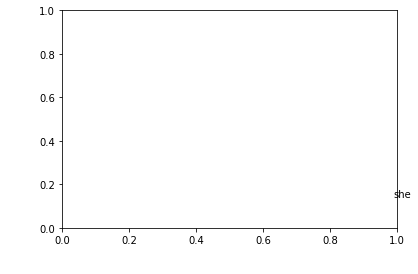

In [27]:
import matplotlib.pyplot as plt

%matplotlib inline
fig, ax = plt.subplots()
print(words)
for word in words:
    print(word, vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
plt.show()